> Notebook com o carregamento dos dados pré-processados, aplicação do GMM e utilização do PCA e t-SNE com os dados gerados pelo algoritmo de clusterização

---

#**Bibliotecas e instalações**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pickle

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# **Dicionário de variáveis**

*   **ESCOLARI**: Código para escolaridade do paciente (int = 1).

      1 – ANALFABETO

      2 – ENS. FUND. INCOMPLETO

      3 – ENS. FUND. COMPLETO

      4 – ENSINO MÉDIO

      5 – SUPERIOR

      9 – IGNORADA
*   **IDADE**: Idade do paciente (int = 3).
*   **SEXO**: Sexo do paciente (int = 1). 

      1 – MASCULINO

      2 – FEMININO
*   **UFNASC**: UF de nascimento (char = 2). Outras opções: SI - Sem informação; OP - Outro país.	
*   **UFRESID**: UF de residência (char = 2). Outras opções: OP - Outro país.
*   **IBGE**: Código da cidade de residência do paciente segundo IBGE com digito verificador (char = 7).
*   **CIDADE**: Cidade de residência do paciente (char = 200).
*   **CATEATEND**: Categoria de atendimento ao diagnóstico (int = 1). 

      1 - CONVENIO

      2 - SUS

      3 – PARTICULAR

      9 – SEM INFORMAÇÃO
*   **DTCONSULT**: Data da 1ª consulta (date = 10). Formato: DD/MM/YYYY	
*   **CLINICA**: Código da clinica (int = 2).

      1 – ALERGIA/IMUNOLOGIA

      2 – CIRURGIA CARDIACA

      3 – CIRURGIA CABEÇA E PESCOÇO

      4 – CIRURGIA GERAL

      5 – CIRURGIA PEDIATRICA

      6 – CIRURGIA PLASTICA

      7 – CIRURGIA TORAXICA

      8 – CIRURGIA VASCULAR

      9 – CLINICA MEDICA

      10 – DERMATOLOGIA

      11 – ENDOCRINOLOGIA

      12 – GASTROCIRURGIA
      
      13 – GASTROENTEROLOGIA
      
      14 – GERIATRIA
      
      15 – GINECOLOGIA
      
      16 – GINECOLOGIA / OBSTETRICIA
      
      17 – HEMATOLOGIA
      
      18 – INFECTOLOGIA
      
      19 – NEFROLOGIA
      
      20 – NEUROCIRURGIA
      
      21 – NEUROLOGIA
      
      22 – OFTALMOLOGIA
      
      23 – ONCOLOGIA CIRURGICA
      
      24 – ONCOLOGIA CLINICA
      
      25 – ONCOLOGIA PEDIATRICA
      
      26 – ORTOPEDIA
      
      27 – OTORRINOLARINGOLOGIA
      
      28 – PEDIATRIA
      
      29 – PNEUMOLOGIA
      
      30 – PROCTOLOGIA
      
      31 – RADIOTERAPIA
      
      32 – UROLOGIA
      
      33 – MASTOLOGIA
      
      34 – ONCOLOGIA CUTANEA
      
      35 – CIRURGIA PELVICA
      
      36 – CIRURGIA ABDOMINAL
      
      37 – ODONTOLOGIA
      
      38 – TRANSPLANTE HEPATICO
      
      99 – IGNORADO	
*   **DIAGPREV**: Diagnóstico e tratamento anterior (int = 1).

      1 – SEM DIAGNÓSTICO / SEM TRATAMENTO
      
      2 – COM DIAGNÓSTICO / SEM TRATAMENTO
      
      3 – COM DIAGNÓSTICO / COM TRATAMENTO
      
      4 – OUTROS	
*   **DTDIAG**: Data do diagnóstico (date = 10). Formato: DD/MM/YYYY	
*   **BASEDIAG**: Código da base do diagnóstico (int = 1).
      
      1 – EXAME CLINICO
      
      2 – RECURSOS AUXILIARES NÃO MICROSCÓPICOS
      
      3 – CONFIRMAÇÃO MICROSCÓPICA
      
      4 – SEM INFORMAÇÃO	
*   **TOPO**: Código da topografia (char = 4). Formato: C999 	
*   **TOPOGRUP**: Grupo da topografia	(char = 3). Formato: C99	
*   **DESCTOPO**: Descrição da Topografia (char = 80).
*   **MORFO**: Código da morfologia (char = 5). Formato: 99999
*   **DESCMORFO**: Descrição da morfologia (char = 80).
*   **EC**: Estádio clínico (char = 5).
*   **ECGRUP**: Grupo do estadiamento clínico (char = 3).

      0 - Tumores primários, classificados como in situ

      I - Tumores localizados

      II - Tumores com envolvimento regional por extensão direta

      III - Tumores com envolvimento regional de linfonodos
      
      IV - Tumores com metástase à distância 

      X - Para tumores não avaliados pelo profissional responsável ou sem informação sobre estadiamento anotada no prontuário

      Y - Para tumores em que não se aplica a classificação TNM. São os tumores não sólidos (por exemplo, as leucemias)
*   **T**: Classificação TNM - T (char = 5).
*   **N**: Classificação TNM - N (char = 5).	
*   **M**: Classificação TNM - M (char = 3).	
*   **PT**: Estadiamento pós cirúrgico (char = 5).
*   **PN**: Estadiamento pós cirúrgico (char = 5).	
*   **PM**: Estadiamento pós cirúrgico (char = 3).	
*   **S**: Classificação TNM - S (int = 1). Domínio: 0; 1; 2; 3; 8 – NÃO SE APLICA; 9 – X
*   **G**: Classificação TNM – G (Grau) (char = 5). 

      Domínio (exceto C40, C41, C381, C382, C383, C47, C48 e C49):
      0; 1; 2; 3; 4; 8 – NÃO SE APLICA; 9 – X

      Domínio (somente C40, C41, C381, C382, C383, C47, C48 e C49):
      ALTO; BAIXO; 8 – NÃO SE APLICA; 9 – X
	
*   **LOCALTNM**: Classificação TNM - Localização (int = 1).
      
      1 – SUPERIOR
      
      2 – MEDIO
      
      3 – INFERIOR
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **IDMITOTIC**: Classificação TNM – Índice Mitótico (int = 1).
      
      1 – ALTA
      
      2 – BAIXA
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **PSA**: Classificação TNM - PSA (int = 1).
      
      1 – MENOR QUE 10
      
      2 – MAIOR OU IGUAL A 10 E MENOR QUE 20
      
      3 – MAIOR OU IGUAL A 20
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **GLEASON**: Classificação TNM - Gleason (int = 1).
      
      1 – MENOR OU IGUAL A 6
      
      2 – IGUAL A 7
      
      3 – MAIOR OU IGUAL A 8
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **OUTRACLA**: Outra classificação de estadiamento (char = 20).
*   **META01**: Metástase (char = 3).	Formato: C99
*   **META02**: Metástase (char = 3).	Formato: C99
*   **META03**: Metástase (char = 3).	Formato: C99
*   **META04**: Metástase (char = 3).	Formato: C99
*   **DTTRAT**: Data de inicio do tratamento (date = 10). Formato: DD/MM/YYYY	
*   **NAOTRAT**: Código da razão para não realização do tratamento (int = 1).
      
      1 – RECUSA DO TRATAMENTO
      
      2 – DOENÇA AVANÇADA, FALTA DE CONDIÇÕES CLINICAS
      
      3 – OUTRAS DOENÇAS ASSOCIADAS
      
      4 – ABANDONO DE TRATAMENTO
      
      5 – OBITO POR CANCER
      
      6 – OBITO POR OUTRAS CAUSAS, SOE
      
      7 – OUTRAS
      
      8 – NÃO SE APLICA (CASO TENHA TRATAMENTO)
      
      9 – SEM INFORMAÇÃO	
*   **TRATAMENTO**: Código de combinação dos tratamentos realizados (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado	
*   **TRATHOSP**: Código de combinação dos tratamentos realizados no hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento

      J – Nenhum tratamento realizado	
*   **TRATFANTES**: Código de combinação dos tratamentos realizados antes/durante admissão fora do hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado
      
      K – Sem informação
*   **TRATFAPOS**: Código de combinação dos tratamentos realizados após admissão fora do hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado
      
      K – Sem informação
*   **NENHUM**: Tratamento recebido no hospital = nenhum (int = 1). 0 – NÃO; 1 – SIM
*   **CIRURGIA**: Tratamento recebido no hospital = cirurgia (int = 1). 0 – NÃO; 1 – SIM
*   **RADIO**: Tratamento recebido no hospital = radioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **QUIMIO**: Tratamento recebido no hospital = quimioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **HORMONIO**: Tratamento recebido no hospital = hormonioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **TMO**: Tratamento recebido no hospital = tmo (int = 1). 0 – NÃO; 1 – SIM
*   **IMUNO**: Tratamento recebido no hospital = imunoterapia (int = 1). 0 – NÃO; 1 – SIM
*   **OUTROS**: Tratamento recebido no hospital = outros (int = 1). 0 – NÃO; 1 – SIM
*   **NENHUMANT**: Tratamento recebido fora do hospital e antes da admissão = nenhum (int = 1). 0 – NÃO; 1 – SIM
*   **CIRURANT**: Tratamento recebido fora do hospital e antes da admissão = cirurgia (int = 1). 0 – NÃO; 1 – SIM
*   **RADIOANT**: Tratamento recebido fora do hospital e antes da admissão = radioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **QUIMIOANT**: Tratamento recebido fora do hospital e antes da admissão = quimioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **HORMOANT**: Tratamento recebido fora do hospital e antes da admissão = hormonioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **TMOANT**: Tratamento recebido fora do hospital e antes da admissão = tmo (int = 1). 0 – NÃO; 1 – SIM
*   **IMUNOANT**: Tratamento recebido fora do hospital e antes da admissão = imunoterapia (int = 1). 0 – NÃO; 1 – SIM
*   **OUTROANT**: Tratamento recebido fora do hospital e antes da admissão = outros (int = 1). 0 – NÃO; 1 – SIM	
*   **NENHUMAPOS**: Tratamento recebido fora do hospital e durante/após admissão = nenhum	(int = 1). 0 – NÃO; 1 – SIM	
*   **CIRURAPOS**: Tratamento recebido fora do hospital e durante/após admissão = cirurgia	(int = 1). 0 – NÃO; 1 – SIM	
*   **RADIOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = radioterapia	(int = 1). 0 – NÃO; 1 – SIM	
*   **QUIMIOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = quimioterapia	(int = 1). 0 – NÃO; 1 – SIM		
*   **HORMOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = hormonioterapia	(int = 1). 0 – NÃO; 1 – SIM		
*   **TMOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = tmo	(int = 1). 0 – NÃO; 1 – SIM		
*   **IMUNOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = imunoterapia	(int = 1). 0 – NÃO; 1 – SIM	
*   **OUTROAPOS**: Tratamento recebido fora do hospital e durante/após admissão = outros	(int = 1). 0 – NÃO; 1 – SIM	
*   **DTULTINFO**: Data da última informação do paciente (date = 10). Formato: DD/MM/YYYY
*   **ULTINFO**: Última informação sobre o paciente (int = 1).
      
      1 – VIVO, COM CÂNCER
      
      2 – VIVO, SOE
      
      3 – OBITO POR CANCER
      
      4 – OBITO POR OUTRAS CAUSAS, SOE
*   **CONSDIAG**: Diferença em dias entre as datas de consulta o diagnóstico (num = dias).
*   **TRATCONS**: Diferença em dias entre as datas de consulta e tratamento (num = dias).	
*   **DIAGTRAT**: Diferença em dias entre as datas de tratamento e diagnóstico (num = dias).
*   **ANODIAG**: Ano de diagnóstico (int = 4). Formato: 9999
*   **CICI**: Tumor infantil (char = 5).	
*   **CICIGRUP**: Tumor infantil – Grupo (char = 80).	
*   **CICISUBGRU**: Tumor infantil – Sub grupo (char = 80).	
*   **FAIXAETAR**: Faixa etária do paciente (char = 5).	
*   **LATERALI**: Lateralidade (int = 1).
      
      1 – DIREITA
      
      2 – ESQUERDA
      
      3 – BILATERAL
      
      8 - NÃO SE APLICA	
*   **INSTORIG**: Instituição de origem (char = 200). Obrigatório somente se DIAGPREV = 03 – COM DIAGNÓSTICO / COM TRATAMENTO
*   **DRS**: Departamentos Regionais de Saúde (char = 200).
*   **RRAS**: RRAS (char = 200).	
*   **PERDASEG**: Perda de seguimento (int = 1). 
      
      0 – Não
      
      1 – Sim
      
      8 – Não se aplica (excluído do cálculo para o indicador perda de seguimento)	
*   **ERRO**: Admissão com erro (int = 1). 0 – Sem; 1 – Com
*   **DTRECIDIVA**: Data da última ocorrência de recidiva (date = 10). Formato: DD/MM/YYYY	
*   **RECNENHUM**: Sem recidiva (int = 1). 0 - Não; 1 - Sim
*   **RECLOCAL**: Recidiva local (int = 1). 0 - Não; 1 - Sim	
*   **RECREGIO**: Recidiva regional (int = 1). 0 - Não; 1 - Sim	
*   **RECDIST**: Recidiva a distância / metástase (int = 1). 0 - Não; 1 - Sim	
*   **REC01**: Local da recidiva/metástase (char = 3). Formato: C99 
*   **REC02**: Local da recidiva/metástase (char = 3). Formato: C99 	
*   **REC03**: Local da recidiva/metástase (char = 3). Formato: C99 
*   **REC04**: Local da recidiva/metástase (char = 3). Formato: C99 	
*   **IBGEATEN**: Código IBGE da instituição (int = 7).	
*   **CIDO**: Código da morfologia 3ª Edição (int = 5). Formato: 99999	
*   **DSCCIDO**: Descrição da morfologia 3ª Edição (char = 89).




# **Dados**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_preprocessing.csv')
print(df.shape)
df.head(3)

(943659, 74)


,ESCOLARI,IDADE,SEXO,UFRESID,IBGE,CATEATEND,CLINICA,DIAGPREV,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN
0,4,40.0,2,26,3530805,9,15,1,3,222,45,81402,0,0,25,15,0,30,0,0,8,8,8,8,8,0,0,0,0,8,0,0,2,9,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,7,95.0,88.0,2000,23,5,4,8,14,15,1,1,0,0,0,0,0,0,0,3509502
1,9,45.0,2,26,3509502,9,15,1,3,222,45,80703,19,3,25,15,0,41,22,8,8,8,8,8,8,0,0,0,0,8,5,5,2,9,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,12,15.0,3.0,2000,23,5,4,8,7,15,0,1,0,0,0,0,0,0,0,3509502
2,2,63.0,2,26,3509502,9,15,1,3,222,45,80703,19,3,25,15,0,41,22,8,8,8,8,8,8,0,0,0,0,8,1,1,2,9,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,6,15.0,9.0,2000,23,5,6,8,7,15,0,1,0,0,0,0,0,0,0,3509502


In [ ]:
df.isna().sum().sort_values(ascending=False).head()

IBGEATEN     0
PN           0
G            0
LOCALTNM     0
IDMITOTIC    0
dtype: int64

In [ ]:
col = df.columns
X = df[col].values
X.shape

(943659, 74)

## **Normalização**

In [ ]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [ ]:
pd.DataFrame(data=X_norm, columns=col).describe()

,ESCOLARI,IDADE,SEXO,UFRESID,IBGE,CATEATEND,CLINICA,DIAGPREV,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN
count,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05,9.436590e+05
mean,-1.130038e-13,-1.080222e-14,-1.537774e-13,4.603859e-13,1.360224e-15,6.779968e-13,-7.516858e-16,-7.868857e-14,-5.306860e-14,-5.120349e-14,6.222969e-14,3.868816e-14,-3.518428e-14,1.156337e-13,-1.236059e-14,-3.104793e-13,1.803285e-13,1.593043e-13,-4.103677e-13,-3.721501e-13,-6.434715e-13,8.263831e-14,-9.542169e-15,-3.035037e-13,-1.493150e-14,1.421304e-13,2.221803e-13,-2.244972e-13,-2.791250e-13,-4.523499e-13,-2.713785e-14,-2.710381e-14,-1.347933e-14,9.824199e-14,9.139386e-14,-1.864898e-13,-2.963625e-14,3.033464e-14,1.809813e-13,9.093163e-14,1.771232e-13,7.649916e-14,2.100906e-13,-8.255507e-15,-8.255748e-15,2.040650e-13,-1.885738e-13,-9.541332e-14,-1.642661e-13,5.783170e-15,-2.095035e-14,-4.271488e-14,5.884254e-14,-5.514632e-13,3.696699e-14,7.931577e-15,2.190875e-14,-4.831541e-14,-2.353950e-14,1.675945e-13,3.523164e-13,1.251109e-13,-4.931823e-13,-1.359398e-13,-6.673524e-13,1.427914e-13,3.468548e-13,-6.341165e-13,-8.040598e-13,-2.720097e-13,-3.067903e-14,3.201143e-13,1.166343e-13,-5.947767e-13
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.146847e+00,-3.546734e+00,-1.000733e+00,-6.070036e+00,-6.635249e+00,-1.108539e+00,-1.621715e+00,-7.686313e-01,-8.091746e+00,-2.618457e+00,-2.590543e+00,-7.943764e-01,-1.467136e+00,-1.519387e+00,-1.282202e+00,-7.610688e-01,-5.246297e-01,-2.170617e+00,-1.747470e+00,-1.750275e+00,-7.190407e+00,-1.967641e+01,-5.199395e+01,-6.047915e+00,-6.262922e+00,-3.572571e-01,-1.894448e-01,-1.055113e-01,-5.373153e-02,-7.590048e+00,-1.011710e+00,-9.935248e-01,-8.688649e+02,-5.995664e+00,-3.015171e-01,-1.288288e+0

#**GMM**

In [ ]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=7).fit(X_norm)
          for n in n_components]

In [ ]:
with open('/content/drive/MyDrive/Trabalho/Cancer/Modelos/gmm_models.pkl', 'wb') as handle:
    pickle.dump({'models': models}, handle)

In [ ]:
with open('/content/drive/MyDrive/Trabalho/Cancer/Modelos/gmm_models.pkl', 'rb') as handle:
    gmm_models = pickle.load(handle)

models = gmm_models['models']

In [ ]:
n_components = np.arange(1, 21)

In [ ]:
y_bic = [m.bic(X_norm) for m in models]
y_aic = [m.aic(X_norm) for m in models]

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=n_components, y=y_bic, 
                         mode='lines+markers', name='BIC'))

fig.add_trace(go.Scatter(x=n_components, y=y_aic, 
                         mode='lines+markers', name='AIC'))

fig.update_layout(xaxis_title='Componentes', title='AIC e BIC', width=800)

fig.show()

In [ ]:
k = 7

gmm = GaussianMixture(n_components =  k, covariance_type='full', random_state=7)
gmm.fit(X_norm)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=7, n_init=1, precisions_init=None,
                random_state=7, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
y_cluster = gmm.predict(X_norm)
y_cluster

array([6, 6, 6, ..., 4, 6, 0])

In [ ]:
df['GRUPO'] = y_cluster
df.head()

,ESCOLARI,IDADE,SEXO,UFRESID,IBGE,CATEATEND,CLINICA,DIAGPREV,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,GRUPO
0,4,40.0,2,26,3530805,9,15,1,3,222,45,81402,0,0,25,15,0,30,0,0,8,8,8,8,8,0,0,0,0,8,0,0,2,9,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,7,95.0,88.0,2000,23,5,4,8,14,15,1,1,0,0,0,0,0,0,0,3509502,6
1,9,45.0,2,26,3509502,9,15,1,3,222,45,80703,19,3,25,15,0,41,22,8,8,8,8,8,8,0,0,0,0,8,5,5,2,9,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,12,15.0,3.0,2000,23,5,4,8,7,15,0,1,0,0,0,0,0,0,0,3509502,6
2,2,63.0,2,26,3509502,9,15,1,3,222,45,80703,19,3,25,15,0,41,22,8,8,8,8,8,8,0,0,0,0,8,1,1,2,9,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,6,15.0,9.0,2000,23,5,6,8,7,15,0,1,0,0,0,0,0,0,0,3509502,6
3,9,64.0,2,26,3545803,9,15,1,3,222,45,80703,19,3,25,15,0,41,22,8,8,8,8,8,8,0,0,0,0,8,1,1,2,9,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,6,33.0,27.0,2000,23,5,6,8,7,15,0,1,0,0,0,0,0,0,0,3509502,6
4,1,48.0,2,26,3530805,9,15,2,3,222,45,80703,19,3,25,15,0,41,22,8,8,8,8,8,8,0,0,0,0,8,1,1,2,9,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,0,132.0,132.0,2000,23,5,4,8,14,15,1,1,0,0,0,0,0,0,0,3509502,6


## **Salvando modelo e StandardScaler**

In [ ]:
with open('/content/drive/MyDrive/Trabalho/Cancer/Modelos/gmm_scaler.pkl', 'wb') as handle:
    pickle.dump({'scaler': scaler}, handle)

In [ ]:
with open('/content/drive/MyDrive/Trabalho/Cancer/Modelos/gmm.pkl', 'wb') as handle:
    pickle.dump({'gmm': gmm}, handle)

## **Salvando os dados**

In [ ]:
df.to_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/gmm_preprocessing.csv', encoding='utf-8', index=False)

# **Dados GMM**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/gmm_preprocessing.csv')
print(df.shape)
df.head(3)

(943659, 75)


,ESCOLARI,IDADE,SEXO,UFRESID,IBGE,CATEATEND,CLINICA,DIAGPREV,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,GRUPO
0,4,40.0,2,26,3530805,9,15,1,3,222,45,81402,0,0,25,15,0,30,0,0,8,8,8,8,8,0,0,0,0,8,0,0,2,9,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,7,95.0,88.0,2000,23,5,4,8,14,15,1,1,0,0,0,0,0,0,0,3509502,6
1,9,45.0,2,26,3509502,9,15,1,3,222,45,80703,19,3,25,15,0,41,22,8,8,8,8,8,8,0,0,0,0,8,5,5,2,9,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,12,15.0,3.0,2000,23,5,4,8,7,15,0,1,0,0,0,0,0,0,0,3509502,6
2,2,63.0,2,26,3509502,9,15,1,3,222,45,80703,19,3,25,15,0,41,22,8,8,8,8,8,8,0,0,0,0,8,1,1,2,9,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,6,15.0,9.0,2000,23,5,6,8,7,15,0,1,0,0,0,0,0,0,0,3509502,6


In [5]:
k = len(df.GRUPO.unique())
k # clusters

7

In [6]:
df.GRUPO.value_counts()

6    427342
1    151742
2    117527
0    101641
4     70669
3     42593
5     32145
Name: GRUPO, dtype: int64

# **Teste 1**

In [7]:
n_samples = 10000 # samples from dataset

df_subset1 = df.sample(n_samples, random_state=7).sort_index().copy()
df_subset1.GRUPO.value_counts()

6    4471
1    1615
2    1286
0    1029
4     767
3     466
5     366
Name: GRUPO, dtype: int64

In [8]:
cols = df.columns
cols = cols.drop(['GRUPO'])
len(cols)

74

In [9]:
df_subset1[cols].shape

(10000, 74)

## **Normalização**



In [10]:
X = df_subset1[cols].values
X.shape

(10000, 74)

In [11]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [12]:
pd.DataFrame(data=X_norm, columns=cols).describe()

,ESCOLARI,IDADE,SEXO,UFRESID,IBGE,CATEATEND,CLINICA,DIAGPREV,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-8.859358e-16,8.159029e-16,1.181544e-15,-6.024281e-15,7.986162e-16,9.289391e-15,1.514527e-15,1.353451e-15,5.957457e-16,-4.098541e-16,-6.483439e-16,-2.823830e-15,1.645439e-15,5.773382e-16,3.623235e-15,1.709188e-15,-1.274536e-15,-5.033829e-15,2.237610e-15,5.504897e-15,-3.738460e-15,-5.035861e-16,-1.247846e-15,4.381501e-15,-8.059226e-15,2.427059e-16,-2.996808e-15,6.332518e-16,-1.884272e-15,1.011347e-15,3.197886e-16,-2.236877e-16,0.0,-1.535000e-15,-3.478018e-15,-3.352696e-15,1.726685e-15,1.437095e-15,-1.058920e-15,-1.457365e-15,2.189990e-15,-6.115242e-15,-3.262036e-16,0.0,0.0,2.898137e-15,1.484401e-15,-3.244571e-16,-3.158251e-16,3.606962e-16,-1.523347e-16,1.971477e-15,-3.160716e-15,-3.462941e-15,2.861406e-16,-5.567213e-17,-7.970624e-16,-1.346643e-14,-9.750534e-17,-1.205075e-15,1.680722e-15,-6.789014e-17,1.403575e-14,1.730444e-15,1.952074e-14,7.771428e-15,-7.851914e-15,2.155442e-16,1.363338e-14,-3.794182e-15,-2.505463e-15,-3.549522e-16,5.807591e-16,1.125388e-14
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.0,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.0,0.0,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.133870e+00,-3.550412e+00,-1.005415e+00,-6.016424e+00,-6.788184e+00,-1.109469e+00,-1.613128e+00,-7.793963e-01,-7.546369e+00,-2.631340e+00,-2.601522e+00,-7.947671e-01,-1.479956e+00,-1.525293e+00,-1.297038e+00,-7.714408e-01,-5.342507e-01,-2.180944e+00,-1.760598e+00,-1.780555e+00,-7.127178e+00,-1.755974e+01,-4.864311e+01,-5.792416e+00,-5.990581e+00,-3.589617e-01,-1.852981e-01,-1.102052e-01,-5.402606e-02,-7.612654e+00,-1.021117e+00,-9.999033e-01,0.0,-5.970787e+00,-3.075239e-01,-1.278146e+00,-5.862805e-01,-7.464230e-01,-3.713695e-01,-6.797983e-02,-7.834180e-02,-2.533168e-01

## **PCA e TSNE**

In [13]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_norm)

df_subset1['pca_one'] = pca_result[:,0]
df_subset1['pca_two'] = pca_result[:,1]

print('Cumulative explained variation for 2 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation for 2 principal components: 0.13873936950225074


In [14]:
fig = px.scatter(df_subset1, x="pca_one", y="pca_two", color=df_subset1.GRUPO.astype(str),
                 height=600, width=900
                )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=0.7, color='white')
                              ),
                  selector=dict(mode='markers'))

fig.show()

In [15]:
pca_50 = PCA(n_components=50)

pca_result_50 = pca_50.fit_transform(X_norm)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9561590622744425


In [16]:
tsne = TSNE(n_components=2, random_state=7, perplexity=50)
tsne_pca_results = tsne.fit_transform(pca_result_50)

df_subset1['tsne_pca50_one'] = tsne_pca_results[:,0]
df_subset1['tsne_pca50_two'] = tsne_pca_results[:,1]

In [17]:
fig = px.scatter(df_subset1, x="tsne_pca50_one", y="tsne_pca50_two", color=df_subset1.GRUPO.astype(str),
                 height=600, width = 900
                )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=0.7, color='white')
                              ),
                  selector=dict(mode='markers'))

fig.show()

In [18]:
df_gmm = pd.DataFrame()
df_gmm['tsne_pca50_one'] = df_subset1['tsne_pca50_one'].copy()
df_gmm['tsne_pca50_two'] = df_subset1['tsne_pca50_two'].copy()
df_gmm['grupo_gmm'] = df_subset1['GRUPO'].copy()
df_gmm.reset_index(inplace=True)
df_gmm.head()

,index,tsne_pca50_one,tsne_pca50_two,grupo_gmm
0,47,40.239433,-7.090451,6
1,84,-0.674899,-22.240349,6
2,113,-29.681396,54.821972,1
3,176,-26.822079,-48.811737,1
4,232,15.206537,34.549042,1


In [19]:
df_gmm.to_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/gmm_tsne.csv', encoding='utf-8', index=False)

# **Teste 2**

In [20]:
n_samples = 10000 # samples from dataset

df_subset2 = df.sample(n_samples, random_state=0).sort_index().copy()
df_subset2.GRUPO.value_counts()

6    4428
1    1612
2    1322
0    1108
4     744
3     467
5     319
Name: GRUPO, dtype: int64

In [21]:
cols = df.columns
cols = cols.drop(['GRUPO'])
len(cols)

74

In [22]:
df_subset2[cols].shape

(10000, 74)

## **Normalização**



In [23]:
X = df_subset2[cols].values
X.shape

(10000, 74)

In [24]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [25]:
pd.DataFrame(data=X_norm, columns=cols).describe()

,ESCOLARI,IDADE,SEXO,UFRESID,IBGE,CATEATEND,CLINICA,DIAGPREV,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,9.225078e-15,-1.686873e-16,-3.925749e-17,-3.277895e-15,7.168120e-16,1.290368e-15,-8.460344e-16,2.051448e-15,-2.579763e-16,3.137268e-16,1.825207e-17,-4.214129e-16,-1.425582e-15,-1.400186e-16,9.379664e-16,8.502352e-16,-1.845191e-17,-6.434264e-15,6.223289e-15,-6.554368e-15,-1.686301e-15,6.256315e-16,-2.109444e-15,-1.716077e-15,2.075778e-15,-1.650513e-15,4.576867e-15,2.084369e-15,-5.459236e-15,-7.889245e-16,-5.665302e-16,5.277834e-16,0.0,-6.728451e-16,2.423850e-15,3.587353e-16,-5.553158e-15,-5.830003e-16,4.369394e-16,-2.371560e-15,-1.329037e-15,1.492129e-15,-4.634635e-15,0.0,0.0,2.364109e-15,-2.429121e-15,9.187151e-16,1.140357e-15,1.345112e-15,-9.363555e-16,-1.523347e-16,9.261175e-16,5.746070e-16,-3.318290e-16,-1.047495e-17,6.091738e-16,1.500786e-14,-1.902783e-16,-2.904327e-15,-1.512090e-15,2.542855e-15,1.124523e-15,4.886147e-16,2.631498e-14,5.292122e-15,1.087269e-15,3.757256e-15,-3.317768e-15,-1.580680e-16,-7.559342e-16,-5.671907e-16,1.347270e-16,6.128364e-15
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.0,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.0,0.0,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.139877e+00,-3.482857e+00,-9.978024e-01,-6.024596e+00,-6.994399e+00,-1.094067e+00,-1.617278e+00,-7.619238e-01,-6.938227e+00,-2.591881e+00,-2.560334e+00,-7.941359e-01,-1.469222e+00,-1.516749e+00,-1.295413e+00,-7.714016e-01,-5.349072e-01,-2.161924e+00,-1.749320e+00,-1.741804e+00,-7.383533e+00,-1.971859e+01,-4.081258e+01,-6.197153e+00,-6.410491e+00,-3.544576e-01,-1.900065e-01,-1.074229e-01,-6.268550e-02,-7.403044e+00,-1.016164e+00,-9.984925e-01,0.0,-5.846213e+00,-3.010506e-01,-1.291821e+00,-5.864345e-01,-7.446373e-01,-3.731108e-01,-5.665927e-02,-8.212912e-02,-2.577579e-01

## **PCA e TSNE**

In [26]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_norm)

df_subset2['pca_one'] = pca_result[:,0]
df_subset2['pca_two'] = pca_result[:,1]

print('Cumulative explained variation for 2 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation for 2 principal components: 0.13786120817856695


In [27]:
fig = px.scatter(df_subset2, x="pca_one", y="pca_two", color=df_subset2.GRUPO.astype(str),
                 height=600, width=900
                )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=0.7, color='white')
                              ),
                  selector=dict(mode='markers'))

fig.show()

In [28]:
pca_50 = PCA(n_components=50)

pca_result_50 = pca_50.fit_transform(X_norm)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9574197239267946


In [29]:
tsne = TSNE(n_components=2, random_state=7, perplexity=50)
tsne_pca_results = tsne.fit_transform(pca_result_50)

df_subset2['tsne_pca50_one'] = tsne_pca_results[:,0]
df_subset2['tsne_pca50_two'] = tsne_pca_results[:,1]

In [32]:
fig = px.scatter(df_subset2, x="tsne_pca50_one", y="tsne_pca50_two", color=df_subset2.GRUPO.astype(str),
                 height=600, width = 900
                )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=0.7, color='white')
                              ),
                  selector=dict(mode='markers'))

fig.show()

In [30]:
#df_gmm = pd.DataFrame()
#df_gmm['tsne_pca50_one'] = df_subset2['tsne_pca50_one'].copy()
#df_gmm['tsne_pca50_two'] = df_subset2['tsne_pca50_two'].copy()
#df_gmm['grupo_gmm'] = df_subset2['GRUPO'].copy()
#df_gmm.reset_index(inplace=True)
#df_gmm.head()

In [31]:
#df_gmm.to_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/gmm_tsne.csv', encoding='utf-8', index=False)

# **Teste 3**

In [33]:
n_samples = 10000 # samples from dataset

df_subset3 = df.sample(n_samples, random_state=3).sort_index().copy()
df_subset3.GRUPO.value_counts()

6    4582
1    1489
2    1300
0    1073
4     731
3     476
5     349
Name: GRUPO, dtype: int64

In [34]:
cols = df.columns
cols = cols.drop(['GRUPO'])
len(cols)

74

In [35]:
df_subset3[cols].shape

(10000, 74)

## **Normalização**



In [36]:
X = df_subset3[cols].values
X.shape

(10000, 74)

In [37]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [38]:
pd.DataFrame(data=X_norm, columns=cols).describe()

,ESCOLARI,IDADE,SEXO,UFRESID,IBGE,CATEATEND,CLINICA,DIAGPREV,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.0,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,5.181211e-15,-1.075251e-16,3.086786e-15,6.891643e-15,2.685407e-16,5.551448e-15,1.713224e-15,-2.028600e-15,-1.065509e-16,4.019673e-16,-1.778400e-15,-1.513900e-15,-4.046319e-16,9.630075e-16,5.688289e-15,-2.002221e-15,4.014900e-16,1.983846e-15,-4.197354e-15,5.295986e-16,3.242556e-15,1.536785e-16,5.094591e-16,6.014533e-15,-6.880935e-15,2.923561e-15,6.445028e-15,6.780040e-15,-1.402510e-15,-2.511530e-15,-8.048451e-16,4.849787e-16,0.0,-3.428596e-15,-4.315726e-15,3.340439e-16,2.318012e-15,-1.032352e-15,-1.843126e-15,-6.135870e-16,1.103839e-17,5.179190e-15,-6.212331e-15,0.0,0.0,5.992895e-15,-1.936715e-15,-3.251172e-15,-1.359426e-15,-1.875999e-16,-1.767335e-15,-1.403893e-15,1.084985e-15,-6.307510e-15,-4.763523e-16,1.839112e-16,-6.130652e-16,-2.380940e-15,-4.122619e-16,-2.508764e-15,3.362843e-15,1.558031e-15,-7.973444e-15,4.759304e-16,9.830414e-15,-6.194500e-15,2.881839e-15,-4.804940e-15,1.039269e-15,-3.236628e-15,-2.606934e-15,-6.083911e-16,2.149701e-15,6.699952e-15
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.0,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.0,0.0,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.148672e+00,-3.539293e+00,-9.972039e-01,-6.105059e+00,-6.444376e+00,-1.094900e+00,-1.626263e+00,-7.752578e-01,-8.249772e+00,-2.553476e+00,-2.541409e+00,-7.859417e-01,-1.473856e+00,-1.526373e+00,-1.285385e+00,-7.652829e-01,-5.311656e-01,-2.227348e+00,-1.788406e+00,-1.795815e+00,-7.085436e+00,-1.980583e+01,-4.006942e+01,-6.072382e+00,-6.268296e+00,-3.503541e-01,-1.873783e-01,-1.082414e-01,-5.422517e-02,-7.516945e+00,-9.966394e-01,-9.786212e-01,0.0,-5.878595e+00,-3.006553e-01,-1.288519e+00,-5.808914e-01,-7.362201e-01,-3.529963e-01,-6.723349e-02,-8.751116e-02,-2.551003e-01

## **PCA e TSNE**

In [39]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_norm)

df_subset3['pca_one'] = pca_result[:,0]
df_subset3['pca_two'] = pca_result[:,1]

print('Cumulative explained variation for 2 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation for 2 principal components: 0.1388700684305845


In [40]:
fig = px.scatter(df_subset3, x="pca_one", y="pca_two", color=df_subset3.GRUPO.astype(str),
                 height=600, width=900
                )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=0.7, color='white')
                              ),
                  selector=dict(mode='markers'))

fig.show()

In [41]:
pca_50 = PCA(n_components=50)

pca_result_50 = pca_50.fit_transform(X_norm)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9552493244845994


In [42]:
tsne = TSNE(n_components=2, random_state=7, perplexity=50)
tsne_pca_results = tsne.fit_transform(pca_result_50)

df_subset3['tsne_pca50_one'] = tsne_pca_results[:,0]
df_subset3['tsne_pca50_two'] = tsne_pca_results[:,1]

In [43]:
fig = px.scatter(df_subset3, x="tsne_pca50_one", y="tsne_pca50_two", color=df_subset3.GRUPO.astype(str),
                 height=600, width = 900
                )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=0.7, color='white')
                              ),
                  selector=dict(mode='markers'))

fig.show()

In [44]:
#df_gmm = pd.DataFrame()
#df_gmm['tsne_pca50_one'] = df_subset3['tsne_pca50_one'].copy()
#df_gmm['tsne_pca50_two'] = df_subset3['tsne_pca50_two'].copy()
#df_gmm['grupo_gmm'] = df_subset3['GRUPO'].copy()
#df_gmm.reset_index(inplace=True)
#df_gmm.head()

In [45]:
#df_gmm.to_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/gmm_tsne.csv', encoding='utf-8', index=False)

# **Resultados**

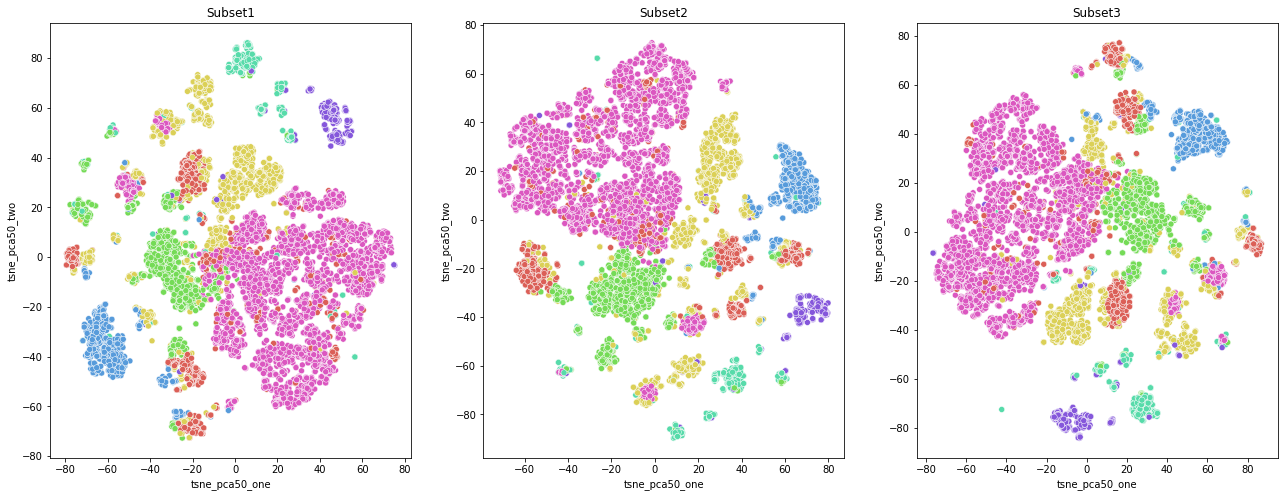

In [ ]:
plt.figure(figsize=(22,8))

ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="tsne_pca50_one", y="tsne_pca50_two",
    hue="GRUPO",
    palette=sns.color_palette("hls", k),
    data=df_subset1,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne_pca50_one", y="tsne_pca50_two",
    hue="GRUPO",
    palette=sns.color_palette("hls", k),
    data=df_subset2,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne_pca50_one", y="tsne_pca50_two",
    hue="GRUPO",
    palette=sns.color_palette("hls", k),
    data=df_subset3,
    ax=ax3
)

ax1.title.set_text('Subset1')
ax2.title.set_text('Subset2')
ax3.title.set_text('Subset3')
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()

plt.show()

# **Balanceado**

In [46]:
df_test = df[df.GRUPO == 5][:1500].copy()
n = df_test.shape[0]
for i in range(k):
  if i != 5:
    df_aux = df[df.GRUPO == i].sample(n, random_state=7).copy()
    df_test = pd.concat([df_test, df_aux])

df_test.GRUPO.value_counts().sort_index()

0    1500
1    1500
2    1500
3    1500
4    1500
5    1500
6    1500
Name: GRUPO, dtype: int64

In [47]:
cols = df_test.columns
cols = cols.drop(['GRUPO'])
len(cols)

74

In [48]:
X = df_test[cols].values
X.shape

(10500, 74)

In [49]:
s = StandardScaler()
X_norm = s.fit_transform(X)

In [50]:
pd.DataFrame(data=X_norm, columns=cols).describe()

,ESCOLARI,IDADE,SEXO,UFRESID,IBGE,CATEATEND,CLINICA,DIAGPREV,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN
count,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,10500.0,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04,1.050000e+04
mean,-1.829140e-15,6.266733e-16,-1.959943e-14,2.238327e-14,1.677905e-16,3.822382e-15,-2.112596e-17,-2.942472e-15,6.398057e-17,-2.284162e-15,7.581607e-16,1.610320e-15,-4.156865e-15,2.920098e-15,-7.421259e-15,1.169147e-14,-1.315561e-16,-7.020627e-15,-2.170412e-15,3.387301e-15,7.163857e-15,4.395217e-15,3.998812e-16,1.248213e-14,-2.930256e-14,-4.332672e-15,-1.797329e-15,-1.024857e-15,4.222818e-15,7.083181e-15,1.074362e-14,-1.223796e-14,6.174950e-15,1.785106e-14,4.158653e-14,-1.062094e-14,-4.421532e-15,1.345038e-14,-1.965283e-14,-4.492853e-15,-6.426026e-15,-3.174593e-15,-4.431224e-16,-7.158764e-16,0.0,1.417903e-14,9.734813e-15,6.301372e-15,-1.300415e-15,-6.725784e-15,-1.247776e-15,1.789970e-16,-6.840454e-16,-2.927616e-15,1.889441e-16,-2.707570e-16,-2.291506e-15,7.412050e-15,-4.511473e-15,-5.122569e-16,-5.107322e-15,-5.600324e-15,3.559164e-16,-2.345734e-14,-4.782693e-15,-3.076016e-15,-4.068597e-15,-1.228996e-15,-7.860152e-15,6.722749e-15,-8.138167e-15,5.492868e-15,-1.172631e-15,4.784702e-15
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,0.0,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.203124e+00,-3.505491e+00,-8.953475e-01,-4.559610e+00,-5.365071e+00,-1.005962e+00,-1.780784e+00,-7.629155e-01,-6.696386e+00,-2.719407e+00,-2.705104e+00,-8.940643e-01,-1.763661e+00,-1.708168e+00,-1.445327e+00,-8.186215e-01,-6.085156e-01,-2.460219e+00,-1.853035e+00,-2.212062e+00,-5.976721e+00,-1.555008e+01,-2.869703e+01,-3.506643e+00,-2.913593e+00,-3.806567e-01,-2.087606e-01,-1.147358e-01,-5.832639e-02,-5.432929e+00,-1.220878e+00,-1.166000e+00,-1.024646e+02,-3.215897e+00,-4.446044e-01,-1.056044e+00,-4.992558e-01,-6.8599

In [51]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_norm)

df_test['pca_one'] = pca_result[:,0]
df_test['pca_two'] = pca_result[:,1]

print('Cumulative explained variation for 2 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation for 2 principal components: 0.14493619020844598


In [52]:
fig = px.scatter(df_test, x="pca_one", y="pca_two", color=df_test.GRUPO.astype(str),
                 height=600, width=900
                )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=0.7, color='white')
                              ),
                  selector=dict(mode='markers'))

fig.show()

In [53]:
pca_50 = PCA(n_components=50)

pca_result_50 = pca_50.fit_transform(X_norm)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.9506405744148916


In [54]:
tsne = TSNE(n_components=2, random_state=7, perplexity=50)
tsne_pca_results = tsne.fit_transform(pca_result_50)

df_test['tsne_pca50_one'] = tsne_pca_results[:,0]
df_test['tsne_pca50_two'] = tsne_pca_results[:,1]

In [55]:
fig = px.scatter(df_test, x="tsne_pca50_one", y="tsne_pca50_two", color=df_test.GRUPO.astype(str),
                 height=600, width=900
                )
fig.update_traces(marker=dict(size=7,
                              line=dict(width=0.7, color='white')
                              ),
                  selector=dict(mode='markers'))

fig.show()

# **Referências**

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

https://medium.com/@violante.andre/an-introduction-to-t-sne-with-python-example-47e6ae7dc58f

https://towardsdatascience.com/t-sne-python-example-1ded9953f26

https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

https://distill.pub/2016/misread-tsne/